# Data Exploration & Cleaning
Data was taken from IPUMS CPS. The focus of this exploration lies on ethnicity/race.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


In [2]:
#pd.set_option('display.max_columns', None)

In [3]:
#data_path = r'../../data/cps_ethnicity_asec.csv'
data_path = r'../../data/cps_00003_income.csv'


occ_92_02_path = r'../../data/occ_92_02.csv'
occ_03_10_path = r'../../data/occ_03_10.csv'
occ_11_19_path =r'../../data/occ_11_19.csv'
occ_20_path =r'../../data/occ_20.csv'

occ2010_data_path = r'../../data/occ2010_codes.txt'
occ1950_data_path = r'../../data/occ1950_codes.txt'
race_occ_path = r'../../data/race_codes.txt'

In [4]:
data_df = pd.read_csv(data_path)
data_df.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,HFLAG,ASECWTH,REGION,STATEFIP,STATECENSUS,...,OCCLY,OCC90LY,OCC10LY,QOCCLY,INCWAGE,MIGSTA1,WHYMOVE,MIGRATE1,UH_SUPREC_A1,UH_SUPREC_A2
0,1991,2,3,19910202888900,1,NaN,782.31,11,23,11,...,19,22,430,0,32000,99,NaN,1,1.0,NaN
1,1991,2,3,19910202888900,1,NaN,782.31,11,23,11,...,19,22,430,0,32000,99,NaN,1,1.0,NaN
2,1991,3,3,19910200505500,1,NaN,847.96,11,23,11,...,178,178,2100,0,33000,99,NaN,1,1.0,NaN
3,1991,3,3,19910200505500,1,NaN,847.96,11,23,11,...,178,178,2100,0,36000,99,NaN,1,1.0,NaN
4,1991,3,3,19910200505500,1,NaN,847.96,11,23,11,...,0,999,9999,0,99999999,0,NaN,0,0.0,NaN


Check for NaN values. Columns that might become important which contain NaN's are ASIAN, CITIZEN, NATIVITY, WHYMOVE

In [5]:
data_df.isna().sum()

YEAR                  0
SERIAL                0
MONTH                 0
CPSID                 0
ASECFLAG              0
HFLAG           5705157
ASECWTH               0
REGION                0
STATEFIP              0
STATECENSUS           0
ASECOVERH             0
PERNUM                0
CPSIDV                0
CPSIDP                0
ASECWT                0
AGE                   0
SEX                   0
RACE                  0
ASIAN           3951546
SPLOC                 0
SPRULE                0
BPL              469470
YRIMMIG          469470
CITIZEN          469470
MBPL             469470
FBPL             469470
NATIVITY         469470
HISPAN                0
EMPSTAT               0
LABFORCE              0
OCC                   0
OCC2010               0
OCC1950               0
QOCC                  0
ASECOVERP             0
OCCLY                 0
OCC90LY               0
OCC10LY               0
QOCCLY                0
INCWAGE               0
MIGSTA1               0
WHYMOVE         

### What is the difference between OCC, OCC2010, OCC1950?
According to the description:
* OCC1950: Occupation, 1950 basis
* OCC2010: Occupation, 2010 basis
* OCC

But why are there different codes for occ? There is nothing documented <br>
When checking if the occ2010 and occ1950 codes are consistent we observe this is true for all but 1 case. e.g. for all entries where OCC = 10 -> OCC2010 = 10 and OCC1950 = 290

Which occupation code col should be used? A combination of different ones?

In [6]:
occ_unique_values = data_df['OCC'].unique()

In [7]:
data_df[data_df['OCC']==19]['OCC2010']

0          430
1          430
5          430
43         430
60         430
          ... 
1828323    320
1837067    320
1837713    320
1848053    320
1850411    320
Name: OCC2010, Length: 5352, dtype: int64

In [8]:
occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)
occ1950_df.columns = ['Code', 'occ_title']

occ_df = pd.read_csv(occ_11_19_path, sep=';')
occ_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11872\899030571.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
C:\Users\jputz\AppData\Local\Temp\ipykernel_11872\899030571.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)


In [9]:
for val in occ_unique_values:
    arr_1950 = data_df[data_df['OCC']==val]['OCC1950'].to_numpy()
    arr_2010 = data_df[data_df['OCC']==val]['OCC2010'].to_numpy()

    print('Occ ', val)
    print('1950: ', (arr_1950[0] == arr_1950).all(), '|', occ1950_df[occ1950_df['Code']==arr_1950[0]]['occ_title'].item())
    print('2010:', (arr_2010[0] == arr_2010).all(), '|', occ2010_df[occ2010_df['Code']==arr_2010[0]]['occ_title'].item())
    print('--------------------------------------')

Occ  19
1950:  False |  Managers, officials, and proprietors (n.e.c.)
2010: False | Managers, nec (including Postmasters)
--------------------------------------
Occ  178
1950:  True |  Lawyers and judges
2010: True | Lawyers, and judges, magistrates, and other judicial workers
--------------------------------------


Occ  0
1950:  True |  NIU
2010: True | NIU
--------------------------------------
Occ  203
1950:  True |  Technicians, medical and dental
2010: True | Clinical Laboratory Technologists and Technicians
--------------------------------------
Occ  37
1950:  True |  Officials and administrators (n.e.c.), public administration
2010: True | Other Business Operations and Management Specialists
--------------------------------------
Occ  144
1950:  True |  Nonscientific subjects
2010: True | Postsecondary Teachers
--------------------------------------
Occ  744
1950:  True |  Operative and kindred workers (n.e.c.)
2010: True | Sewing Machine Operators
--------------------------------------
Occ  95
1950:  True |  Nurses, professional
2010: True | Registered Nurses
--------------------------------------
Occ  234
1950:  True |  Clerical and kindred workers (n.e.c.)
2010: True | Paralegals and Legal Assistants
--------------------------------------
Occ  313
1950:  True |  Stenographers, typists, a

Since the occ code titles are only available for the years between 2011 and 2019, the dataframe needs to be filtered in order to compare this column as well. Comparing the occupation titles, they seem to be similar for all three occupation columns.

In [10]:
data_11_19 = data_df[data_df['YEAR'].between(2011, 2019)]
occ_unique_values = data_11_19['OCC'].unique()

In [11]:
for val in occ_unique_values:
    arr_1950 = data_11_19[data_11_19['OCC']==val]['OCC1950'].to_numpy()
    arr_2010 = data_11_19[data_11_19['OCC']==val]['OCC2010'].to_numpy()

    print('Occ ', val, '|', occ_df[occ_df['Code'] == val]['occ_title'].item())
    print('1950: ', (arr_1950[0] == arr_1950).all(), '|', occ1950_df[occ1950_df['Code']==arr_1950[0]]['occ_title'].item())
    print('2010:', (arr_2010[0] == arr_2010).all(), '|', occ2010_df[occ2010_df['Code']==arr_2010[0]]['occ_title'].item())
    print('--------------------------------------')

Occ  0 | Not in universe
1950:  True |  NIU
2010: True | NIU
--------------------------------------
Occ  220 | Construction managers
1950:  True |  Managers, officials, and proprietors (n.e.c.)
2010: True | Constructions Managers
--------------------------------------
Occ  430 | Managers, all other
1950:  True |  Managers, officials, and proprietors (n.e.c.)
2010: True | Managers, nec (including Postmasters)
--------------------------------------
Occ  5700 | Secretaries and administrative assistants
1950:  True |  Stenographers, typists, and secretaries
2010: True | Secretaries and Administrative Assistants
--------------------------------------
Occ  7200 | Automotive service technicians and mechanics
1950:  True |  Mechanics and repairmen, automobile
2010: True | Automotive Service Technicians and Mechanics
--------------------------------------
Occ  7700 | First-line supervisors/managers of production and operating workers
1950:  True |  Foremen (n.e.c.)
2010: True | First-Line Super

This dataframe only contains entries with ASECFLAG = 1

In [12]:
data_df['ASECFLAG'].unique()

array([1], dtype=int64)

### Year
The entire dataset originally contains entries between the years 1991 and 2023.
As already mentioned, the occupation titles for the OCC column are only available for the years 1992 and 2023. Therefore, further analysis will focus on those years only.

In [13]:
data_df['YEAR'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [14]:
data_df = data_df[data_df['YEAR'].between(1992, 2023)]

### Age
Some entries seem to represent kids (age <= 14) which have no occupation. We are only interested in adults (age > 18).

In [15]:
np.sort(data_df['AGE'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90], dtype=int64)

In [16]:
data_df[data_df['AGE']<=14]['OCC'].unique()

array([0], dtype=int64)

In [17]:
data_df = data_df[data_df["AGE"] >=18]

### Employed

Filter only employed people. They have employment status:

Why not 01?<br>
01  Armed Forces, In Labor Force, Employed<br>
10  At work<br>
12  Has job, not at work last week

In [18]:
employed_codes = [1, 10, 12]
unemployed_occ_codes = [0, 9840]
data_df = data_df[data_df["EMPSTAT"].isin(employed_codes)]
data_df = data_df[~data_df["OCCLY"].isin(unemployed_occ_codes)]

In [19]:
not_used = [550, 610, 920, 1730, 1750, 1850, 2030, 2730, 3020, 3810, 4310, 
 4330, 4630, 4730, 4910, 6030, 6340, 6410, 6450, 6810, 7230, 7250, 
 7530, 7820, 7910, 8050, 8110, 8820, 9250, 9320]
data_df[data_df['OCC'].isin(not_used)]['OCC'].unique()

array([6410, 4330, 1750], dtype=int64)

### Occupation Categories
Since there are 531 different occupations, they are divided into categories. 

First an additional column containing the occupation title is introduced. The codes and their corresponding title differs between years, which is why this is done seperately and then combined again.

In order to ensure comparability over time, the variable OCC1950 and OCC2010 are provided. OCC2010 maps all OCC codes into a 2010 census scheme. Hence, this column is used for assigning categories. (https://cps.ipums.org/cps-action/variables/OCC2010#description_section)

In [20]:
data_df['OCC'].unique().size

1206

In [21]:
occ_20 = pd.read_csv(occ_20_path, sep=';')
occ_11_19 = pd.read_csv(occ_11_19_path, sep=';')
occ_03_10 = pd.read_csv(occ_03_10_path, sep=';')
occ_92_02 = pd.read_csv(occ_92_02_path, sep=';')

In [22]:
data_df_20 = pd.merge(data_df[data_df['YEAR'].between(2020, 2023)], occ_20, on = 'OCC')
data_df_11_19 = pd.merge(data_df[data_df['YEAR'].between(2011, 2019)], occ_11_19, on = 'OCC')
data_df_03_10 = pd.merge(data_df[data_df['YEAR'].between(2003, 2010)], occ_03_10, on = 'OCC')
data_df_92_02 = pd.merge(data_df[data_df['YEAR'].between(1992, 2002)], occ_92_02, on = 'OCC')

In [23]:
data_df = pd.concat([data_df_92_02, data_df_03_10, data_df_11_19, data_df_20])

In [24]:
with open('occ_2010_cat.json', 'r') as file:
    occ_2010_cat = json.load(file)

In [25]:
category_df = pd.DataFrame([(code, category) for category, codes in occ_2010_cat.items() for code in codes],
                           columns=['OCC2010', 'Category'])

In [26]:
data_df = pd.merge(data_df, category_df, on='OCC2010')

In [27]:
pd.set_option('display.max_rows', None)
category_distribution_df = data_df.groupby('Category')['ASECWT'].sum().reset_index(name='ASECWT_sum')
category_distribution_df['count'] = data_df.groupby('Category')['ASECWT'].size().reset_index(name='count')['count']
category_distribution_df

,Category,ASECWT_sum,count
0,ARCHITECTURE AND ENGINEERING,7.908640e+07,43452
1,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",8.622167e+07,46630
2,BUILDING AND GROUNDS CLEANING AND MAINTENANCE,1.566988e+08,94289
3,BUSINESS OPERATIONS SPECIALISTS,1.047094e+08,57456
4,COMMUNITY AND SOCIAL SERVICES,6.968066e+07,41141
5,COMPUTER AND MATHEMATICAL,1.156468e+08,61440
6,CONSTRUCTION,2.311578e+08,135197
7,"EDUCATION, TRAINING, AND LIBRARY",2.739214e+08,160600
8,EXTRACTION,5.859604e+06,4576
9,"FARMING, FISHING, AND FORESTRY",2.918391e+07,19506


The plot visualizes the proportion of each occupation category relative to the total sum of weights. It shows that they are not equally distributed.

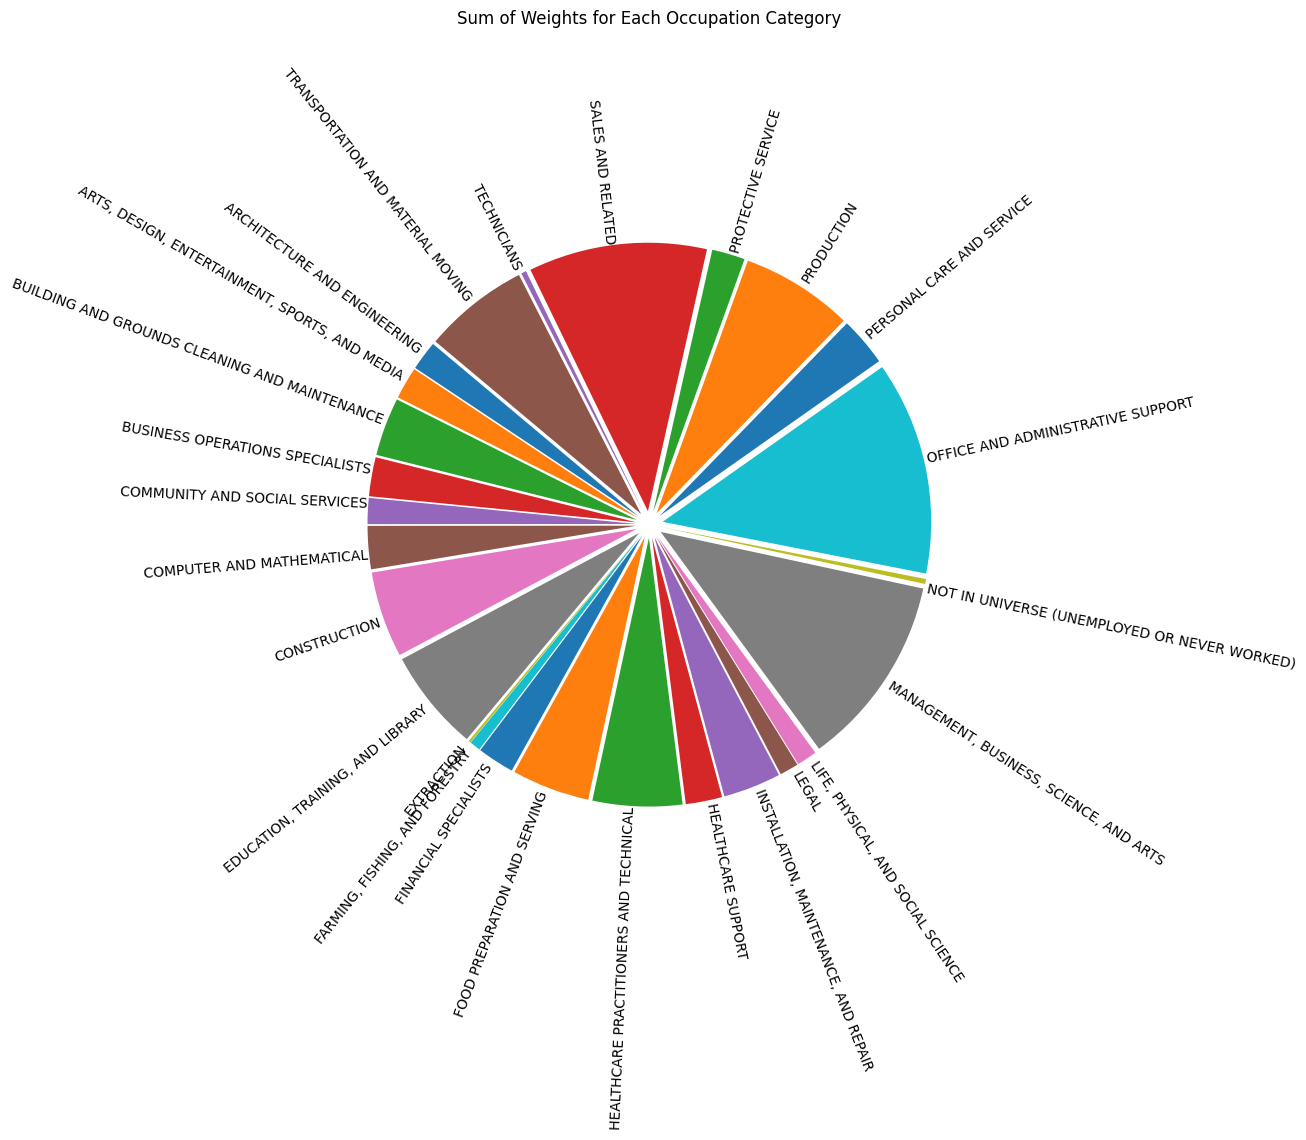

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_distribution_df['ASECWT_sum'], labels=category_distribution_df['Category'],
        rotatelabels=True, labeldistance=1, explode=[0.05] * len(category_distribution_df['Category']),
        startangle=140
        )

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Sum of Weights for Each Occupation Category', y = 1.3)
plt.show()

## RACE
* RACE
* ASIAN
* HISPAN

In [29]:
race_codes = pd.read_csv(race_occ_path, sep='                 ', header=None)
race_codes.columns = ['RACE', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11872\1532179367.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes = pd.read_csv(race_occ_path, sep='                 ', header=None)


In [30]:
def race_distribution(df: pd.DataFrame, race_col: str, race_codes: pd.DataFrame) -> pd.DataFrame:
    """ Calculate the total count and the weighted sum
        per race and return results in a dataframe
    """
    counts = df[race_col].value_counts().rename_axis(race_col).reset_index(name='total_counts')
    weights = df.groupby(race_col)['ASECWT'].sum().reset_index(race_col)

    # merge weights and counts per race
    dist = counts.merge(weights, on=race_col)

    # add race titles
    dist = dist.merge(race_codes, on=race_col, how='left')
    dist = dist.reindex(['RACE','race_title','total_counts','ASECWT'], axis=1)  

    return dist

In [31]:
def plot_race_distribution(df: pd.DataFrame, weighed: bool, legend_x: float = 1.15, legend_y: float =.9, title_y: float = 1.4):
    if weighed:
        dist_col = 'ASECWT'
        title = 'Weighed count per race'
    else: 
        dist_col = 'total_counts'
        title = 'Total count per race'

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df[dist_col], #labels=race_counts["race_y"],
            rotatelabels=True, labeldistance=1, explode=[0.01] * len(df['race_title']),
            startangle=140, colors=plt.cm.tab20c.colors
            )

    ax.set_title(title, y = title_y)
    ax.legend(df['race_title'], ncol=2, loc='lower right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

In [32]:
data_df['RACE'].unique()

array([100, 200, 650, 300, 700, 651, 802, 803, 804, 652, 809, 813, 806,
       801, 810, 805, 808, 807, 819, 820, 830, 811, 817, 815, 814, 812,
       816, 818], dtype=int64)

In [33]:
race_dist = race_distribution(data_df, 'RACE', race_codes)

In [34]:
race_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,2097486,3.642035e+09
1,200,Black,254795,4.976344e+08
2,651,Asian only,103591,1.743610e+08
3,300,American Indian/Aleut/Eskimo,28928,3.696525e+07
4,650,Asian or Pacific Islander,28773,4.860187e+07
5,802,White-American Indian,13825,1.919465e+07
6,652,Hawaiian/Pacific Islander only,8713,1.074986e+07
7,801,White-Black,6196,1.258271e+07
8,803,White-Asian,5575,8.577498e+06
9,700,"Other (single) race, n.e.c.",2614,2.871857e+06


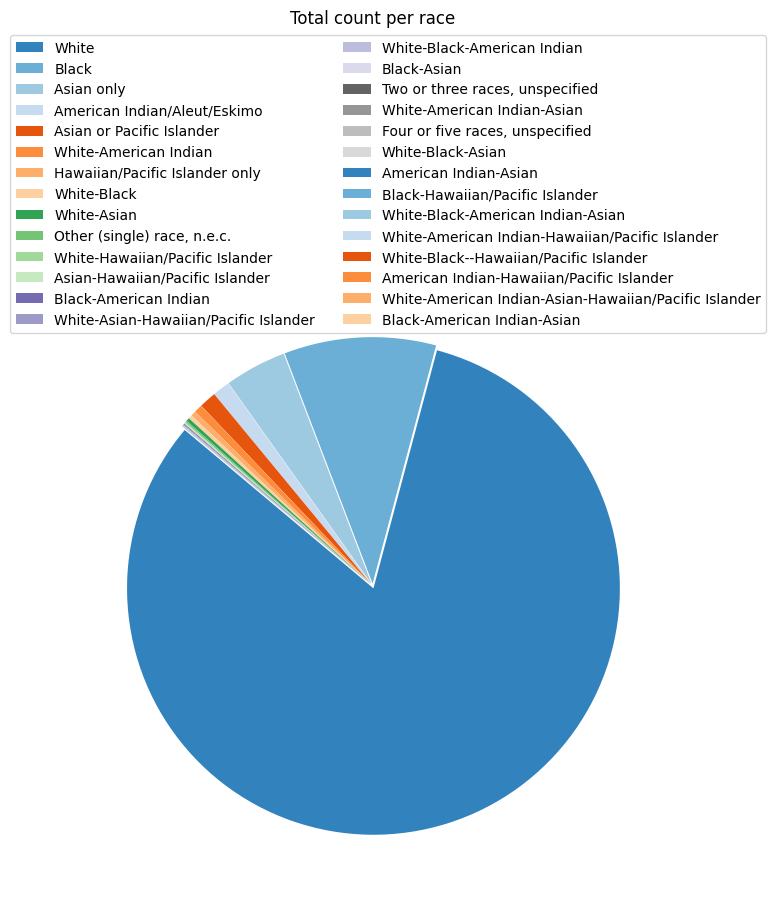

In [35]:
plot_race_distribution(race_dist, weighed=False)

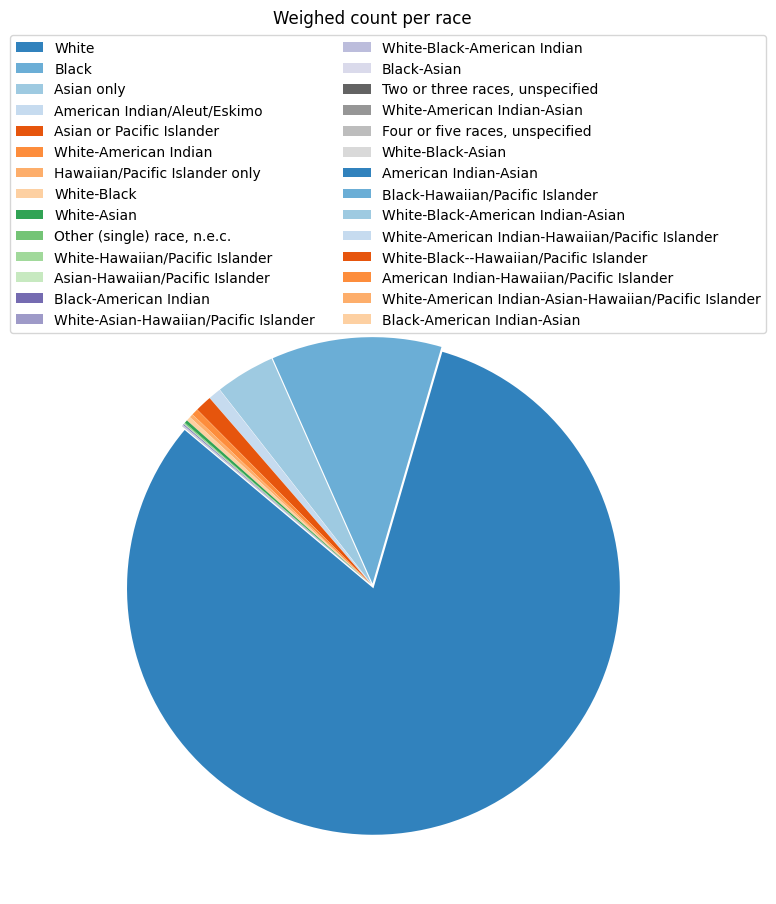

In [36]:
plot_race_distribution(race_dist, weighed=True)

The above plots show that the races are not evenly distributed since they represent the U.S. population. However, for analytical reasons, some adjustments are made. First, the races 801 - 819 are combined. Up to 2003 or 2013, those could not be chosen seperately anyways.

In [37]:
data_df_restructured = data_df.copy()
data_df_restructured['RACE'] = data_df['RACE'].replace(range(801, 820), 800)

In [38]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [39]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,2097486,3.642035e+09
1,200,Black,254795,4.976344e+08
2,651,Asian only,103591,1.743610e+08
3,800,Two or more races,33897,4.979315e+07
4,300,American Indian/Aleut/Eskimo,28928,3.696525e+07
5,650,Asian or Pacific Islander,28773,4.860187e+07
6,652,Hawaiian/Pacific Islander only,8713,1.074986e+07
7,700,"Other (single) race, n.e.c.",2614,2.871857e+06
8,820,"Two or three races, unspecified",210,1.720589e+05
9,830,"Four or five races, unspecified",146,9.678731e+04


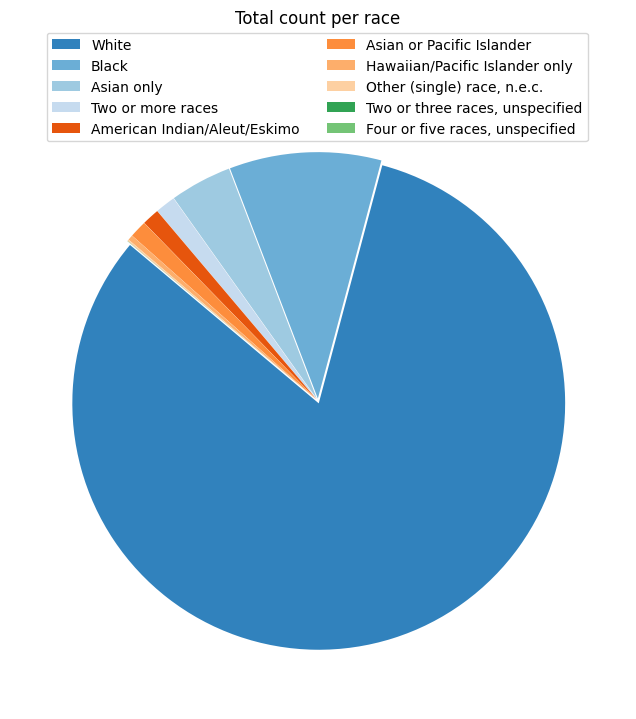

In [40]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.95, legend_y=.91, title_y = 1.1)

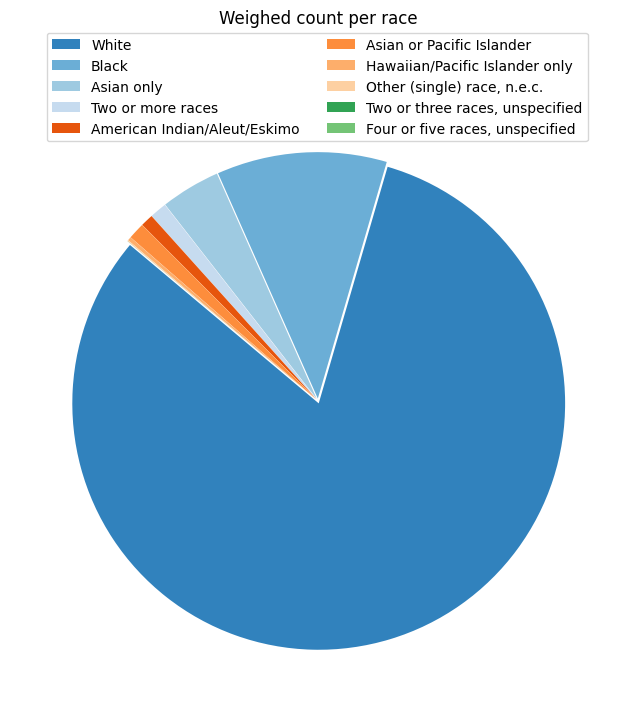

In [41]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.95, legend_y=.91, title_y = 1.1)

#### Asian

Only people with code 651 (Asian Only) have a ASIAN code assigned, so this is already well labeled/grouped. Hence, no further adjustments are made.
99 = not in universe.

In [42]:
data_df['ASIAN'].unique()

array([nan, 99., 60., 30., 70., 40., 50., 20., 10.])

In [43]:
for code in data_df['ASIAN'].unique():
    codes = data_df[data_df['ASIAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

nan :  []
99.0 :  [100, 200, 803, 806, 652, 801, 300, 809, 813, 802, 810, 804, 808, 805, 819, 817, 830, 815, 814, 811, 820, 807, 812, 816, 818]
60.0 :  [651]
30.0 :  [651]
70.0 :  [651]
40.0 :  [651]
50.0 :  [651]
20.0 :  [651]
10.0 :  [651]


#### Hispan

- 100-109: Mexican
- 200: Puerto Rican
- 300: Cuban
- 400: Dominican
- 500: Salvadoran
- 901, 902: are not relevant (don't know, n/a)

In [44]:
data_df_restructured['HISPAN'].unique()

array([  0, 200, 300, 600, 102, 610, 108, 901, 902, 100, 612, 611, 500,
       400, 104], dtype=int64)

In [45]:
for code in np.sort(data_df_restructured['HISPAN'].unique()):
    codes = data_df_restructured[data_df_restructured['HISPAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

0 :  [100, 200, 650, 300, 651, 800, 652, 700, 820, 830]
100 :  [100, 200, 651, 300, 800, 652, 820, 830]
102 :  [100, 700, 300, 650, 200]
104 :  [100, 650, 200, 700, 300]
108 :  [100, 200, 700, 300, 650]
200 :  [100, 200, 800, 300, 650, 651, 652, 700, 820, 830]
300 :  [100, 200, 300, 650, 651, 800, 700, 652, 830, 820]
400 :  [100, 200, 651, 300, 652, 800]
500 :  [800, 100, 300, 200, 651, 652]
600 :  [100, 200, 700, 652, 651, 800, 300, 650, 820, 830]
610 :  [100, 700, 300, 652, 800, 200, 650, 651, 820]
611 :  [100, 200, 300, 800, 652, 651, 830]
612 :  [100, 300, 800, 200, 652, 651]
901 :  [100, 650, 300, 200, 700]
902 :  [200, 100, 700, 650, 300]


In [46]:
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([100, 102, 103, 104, 108, 109]), 'RACE'] = 910
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([200]), 'RACE'] = 920
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([300]), 'RACE'] = 930
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([400]), 'RACE'] = 940
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([500]), 'RACE'] = 950
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([600, 610, 611, 612]), 'RACE'] = 960

In [47]:
data_df_restructured['RACE'].unique()

array([100, 200, 920, 930, 650, 300, 960, 910, 651, 800, 652, 950, 940,
       700, 820, 830], dtype=int64)

In [48]:
race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)
race_codes.columns = ['RACE', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_11872\1885069617.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)


In [49]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [50]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,1734424,3.087899e+09
1,200,Black,243822,4.748715e+08
2,910,Mexican,238464,3.773982e+08
3,651,Asian only,101389,1.699786e+08
4,960,Other Hispanic,93991,1.337993e+08
5,920,Puerto Rican,33214,4.987122e+07
6,800,Two or more races,28131,3.871807e+07
7,650,Asian or Pacific Islander,28126,4.778709e+07
8,300,American Indian/Aleut/Eskimo,23054,2.597864e+07
9,930,Cuban,15946,2.615721e+07


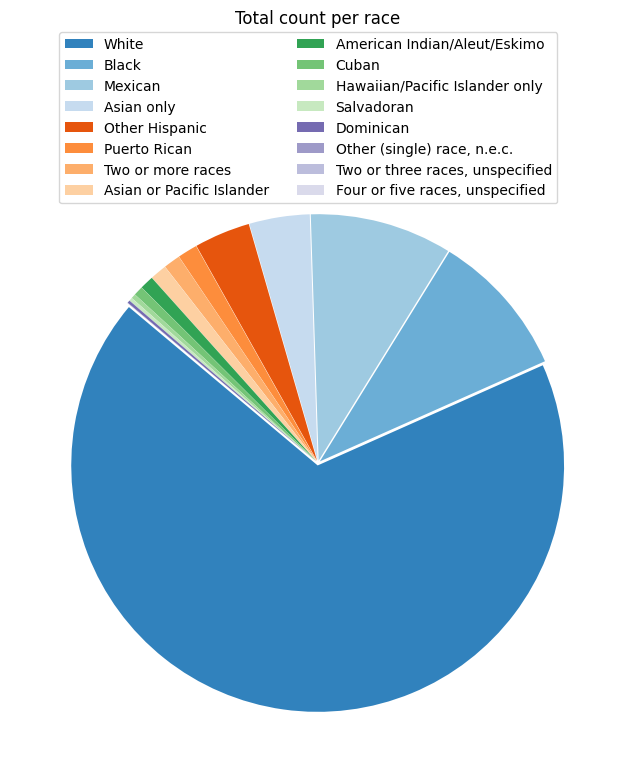

In [51]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.9, legend_y=.91, title_y=1.2)

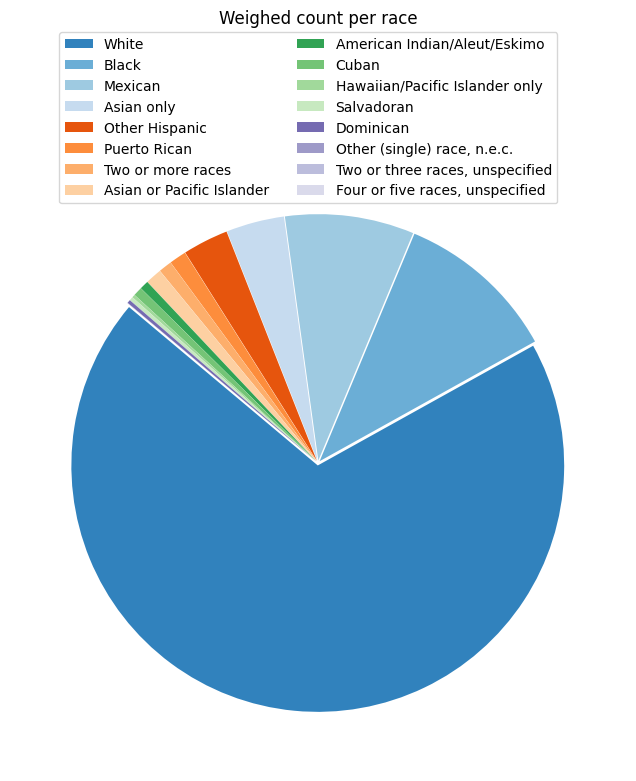

In [52]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.9, legend_y=.91, title_y=1.2)

## Save dataframe

In [53]:
data_df.to_csv('../../data/cps_clean_original_races.csv', index=False, sep=';')

In [ ]:
data_df_restructured.to_csv('../../data/cps_clean_restructured_races.csv', index=False, sep=';')